In [54]:
import pandas as pd
import numpy as np

#tensorflow
import tensorflow as tf
from tensorflow import keras

# Importing the required Keras modules containing model and layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

import matplotlib.pyplot as plt
print(tf.__version__)

2.1.0


# Importing Fashion MNIST Dataset

In [55]:
fashion_mnist=keras.datasets.fashion_mnist

In [56]:
(train_images_orig,train_labels),(test_images_orig,test_labels)=fashion_mnist.load_data()

# Image Information

In [57]:
print("Training images :",train_images_orig.shape)
print("no of Training image:",train_images_orig.shape[0])
print("training image size:",str(train_images_orig.shape[1])+"x"+str(train_images_orig.shape[1]))
print()
print("Test images :",test_images_orig.shape)
print("no of Test image:",test_images_orig.shape[0])
print("Testing image size:",str(test_images_orig.shape[1])+"x"+str(test_images_orig.shape[1]))

Training images : (60000, 28, 28)
no of Training image: 60000
training image size: 28x28

Test images : (10000, 28, 28)
no of Test image: 10000
Testing image size: 28x28


# Data Preprocessing 

In [58]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [59]:
def mnist_labels(y):
    if(y==0):
        return("0:T-shirt/top")
    if(y==1):
        return("1:Trouser")
    if(y==2):
        return("2:Pullover")
    if(y==3):
        return("3:Dress")
    if(y==4):
        return("4:Coat")
    if(y==5):
        return("5:Sandal")
    if(y==6):
        return("6:Shirt")
    if(y==7):
        return("7:Sneaker")
    if(y==8):
        return("8:Bag")
    else:
        return("9:Ankle boot")
    

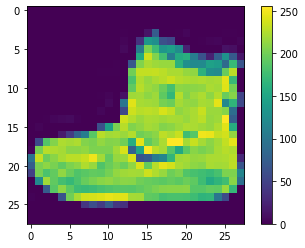

y = 9:Ankle boot


In [60]:
index=0
plt.figure()
plt.imshow(train_images_orig[index])
plt.colorbar()
plt.grid(False)
plt.show()

y=int(np.squeeze(train_labels[index]))
print ("y = " +mnist_labels(y))


Scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, divide the values by 255. It's important that the training set and the testing set be preprocessed in the same way:

In [61]:
train_images=train_images_orig/255
test_images=test_images_orig/255

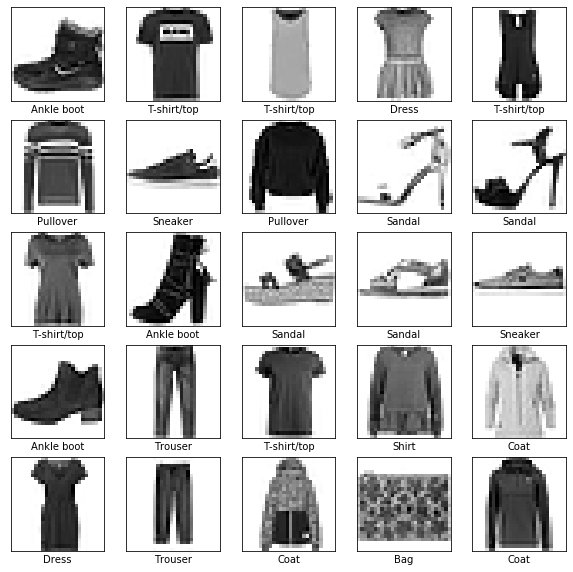

In [62]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()


In [63]:
input_shape=(train_images.shape[1],train_images.shape[2],1)
print(input_shape)

(28, 28, 1)


In [64]:
# Reshaping the array to 4-dims so that it can work with the Keras API
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

<h1>what is conv2d? </h1>

CNNs process images as volumes, receiving a color image as a rectangular box where the width and height are measure by the number of pixels associated with each dimension, and the depth is three layers deep for each color (RGB). These layers are called channels. Within each pixel of the image, the intensity of the R, G, or B is expressed by a number. That number is part of three, stacked two-dimensional matrices that make up the image volume and form the initial data that is fed to into the convolutional network. The network then begins to filter the image by grouping squares of pixels together and looking for patterns, performing what is known as a convolution. This process of pattern analysis is the foundation of CNN functions.

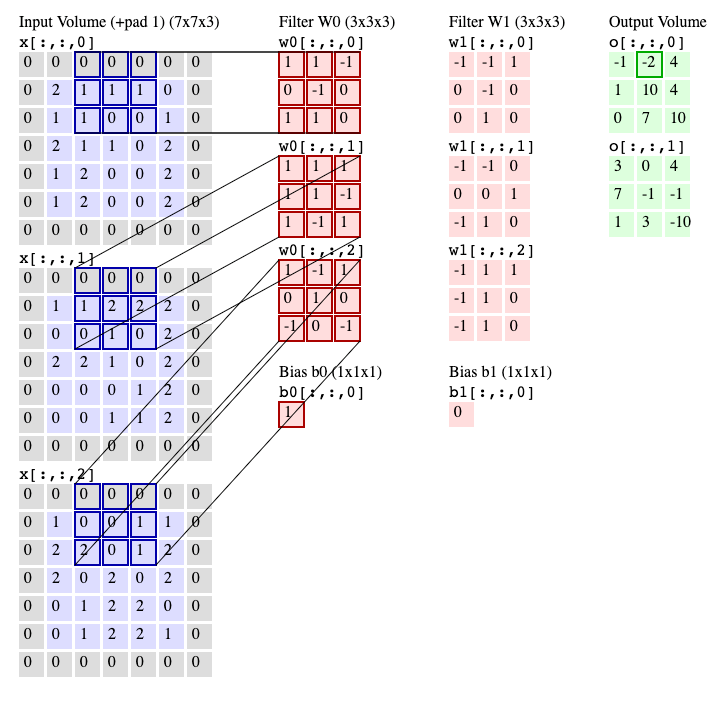

<h1>What is Max Pooling?</h1>

Pooling is a feature commonly imbibed into Convolutional Neural Network (CNN) architectures. The main idea behind a pooling layer is to “accumulate” features from maps generated by convolving a filter over an image. Formally, its function is to progressively reduce the spatial size of the representation to reduce the amount of parameters and computation in the network. The most common form of pooling is max pooling.

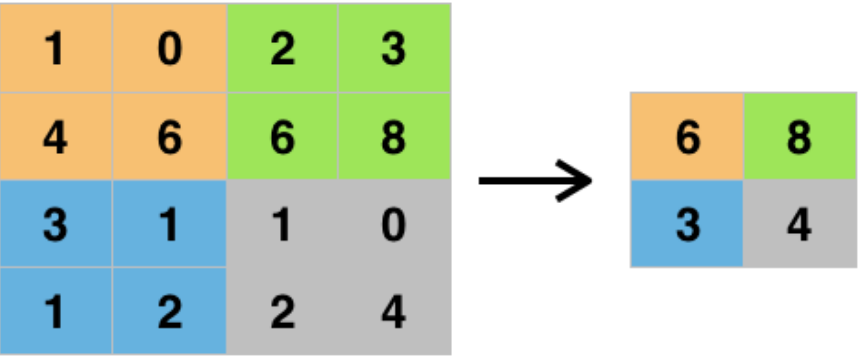


Max pooling is done to in part to help over-fitting by providing an abstracted form of the representation. As well, it reduces the computational cost by reducing the number of parameters to learn and provides basic translation invariance to the internal representation. Max pooling is done by applying a max filter to (usually) non-overlapping subregions of the initial representation. The other forms of pooling are: average, general. 

<h1>what is Flatten ?</h1>

 tf.keras.layers.Flatten, transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels).

<h1>What is dense?</h1>

After the pixels are flattened, the network consists of a sequence of two tf.keras.layers.Dense layers. These are densely connected, or fully connected, neural layers. The first Dense layer has 128 nodes (or neurons). The second (and last) layer returns a logits array with length of 10. Each node contains a score that indicates the current image belongs to one of the 10 classes.

In [65]:
model=Sequential()
model.add(Conv2D(filters=50, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected neural layers.
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))


<h1>What is the Adam Optimization Algorithm?</h1>

Adam is an alternative optimization algorithm that provides more efficient neural network weights by running repeated cycles of “adaptive moment estimation.” Adam extends on stochastic gradient descent to solve non-convex problems faster while using fewer resources than many other optimization programs. It’s most effective in extremely large data sets by keeping the gradients “tighter” over many learning iterations.

Adam combines the advantages of two other stochastic gradient techniques, Adaptive Gradients and Root Mean Square Propagation, to create a new learning approach to optimize a variety of neural networks.

<h1>Adam vs Classical Stochastic Gradient Descent</h1>

With stochastic gradient descent (SGD), a single learning rate (called alpha) is used for all weight updates. In addition, the learning rate for each network parameter (weight) does not change during training.

Now SGD does separately calculate the individual adaptive learning rates for different weights for later human analysis by taking estimates of the first (the mean) and second (the uncentered variance) moments of the gradients.

Adam, on the other hand, adapts the parameter learning rates in real-time based on the average of the first and second moments. In particular, by calculating an exponential moving average of the gradient as well as the squared gradient. Then the parameters beta1 and beta2 can control the decay rates of both moving averages. Finally, bias correction estimates are run before updating the learning parameters.


<h1> Losses </h1>

<b>class BinaryCrossentropy:</b> Computes the cross-entropy loss between true labels and predicted labels.

class CategoricalCrossentropy: Computes the crossentropy loss between the labels and predictions.

class CategoricalHinge: Computes the categorical hinge loss between y_true and y_pred.

class CosineSimilarity: Computes the cosine similarity between y_true and y_pred.

class Hinge: Computes the hinge loss between y_true and y_pred.

class Huber: Computes the Huber loss between y_true and y_pred.

class KLDivergence: Computes Kullback-Leibler divergence loss between y_true and y_pred.

class LogCosh: Computes the logarithm of the hyperbolic cosine of the prediction error.

class Loss: Loss base class.

class MeanAbsoluteError: Computes the mean of absolute difference between labels and predictions.

class MeanAbsolutePercentageError: Computes the mean absolute percentage error between y_true and y_pred.

class MeanSquaredError: Computes the mean of squares of errors between labels and predictions.

class MeanSquaredLogarithmicError: Computes the mean squared logarithmic error between y_true and y_pred.

class Poisson: Computes the Poisson loss between y_true and y_pred.

class Reduction: Types of loss reduction.

class SparseCategoricalCrossentropy: Computes the crossentropy loss between the labels and predictions.

class SquaredHinge: Computes the squared hinge loss between y_true and y_pred.

<h1>The three most common loss functions are:</h1>

    ‘binary_crossentropy‘ for binary classification.
    ‘sparse_categorical_crossentropy‘ for multi-class classification.
    ‘mse‘ (mean squared error) for regression.


<h1>For a list of supported metrics, see:</h1>
<a href="https://www.tensorflow.org/api_docs/python/tf/keras/metrics"><h2>tf.keras Metrics</h2></a>


# Compile the model

In [66]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

# Fit the model

Feed the model
To start training, call the model.fit method—so called because it "fits" the model to the training data:

<h1>What is an Epoch?</h1>

In terms of artificial neural networks, an epoch refers to one cycle through the full training dataset. Usually, training a neural network takes more than a few epochs. In other words, if we feed a neural network the training data for more than one epoch in different patterns, we hope for a better generalization when given a new "unseen" input (test data). 

<img style="box-sizing: border-box; direction: ltr; max-width: 100%;" src="https://qphs.fs.quoracdn.net/main-qimg-9b9e79594d7abe0f0fd3ca350844fa00">

<img src="https://miro.medium.com/max/1226/1*YBzwZnuQmNNcAHMXchMJkQ.png">

In [68]:
model.fit(x=train_images,y=train_labels, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 31s 517us/step - loss: 0.1063 - accuracy: 0.9606
Epoch 2/10
60000/60000 [==============================] - 33s 542us/step - loss: 0.0978 - accuracy: 0.9636
Epoch 3/10
60000/60000 [==============================] - 31s 514us/step - loss: 0.0952 - accuracy: 0.9642
Epoch 4/10
60000/60000 [==============================] - 32s 538us/step - loss: 0.0885 - accuracy: 0.9667
Epoch 5/10
60000/60000 [==============================] - 32s 541us/step - loss: 0.0824 - accuracy: 0.9692
Epoch 6/10
60000/60000 [==============================] - 31s 517us/step - loss: 0.0764 - accuracy: 0.9715
Epoch 7/10
60000/60000 [==============================] - 31s 511us/step - loss: 0.0766 - accuracy: 0.9708
Epoch 8/10
60000/60000 [==============================] - 32s 527us/step - loss: 0.0681 - accuracy: 0.9750s - loss: 0.0679 
Epoch 9/10
60000/60000 [==============================] - 32s 529us/step - loss: 0.0720 - accuracy: 0.9736
Epoch 10/10
60000/60

In [69]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 50)        500       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 50)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 8450)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               1081728   
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1290      
Total params: 1,083,518
Trainable params: 1,083,518
Non-trainable params: 0
____________________________________________

<h1>Evaluate accuracy</h1>

Next, compare how the model performs on the test dataset:

In [70]:
preds = model.evaluate(test_images, test_labels)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

10000/10000 [==============================] - 1s 93us/step
Loss = 0.42554386121332644
Test Accuracy = 0.9129999876022339


<h1>Make predictions</h1>

With the model trained, you can use it to make predictions about some images. The model's linear outputs, logits. Attach a softmax layer to convert the logits to probabilities, which are easier to interpret. 

In [71]:
predictions = model.predict(test_images)

Here, the model has predicted the label for each image in the testing set. Let's take a look at the first prediction:

In [72]:
predictions[0]

array([6.3249393e-17, 1.1803748e-16, 1.7788197e-16, 6.5881896e-19,
       4.2808416e-18, 1.7398298e-11, 3.5371199e-16, 3.1454372e-10,
       9.9476142e-15, 1.0000000e+00], dtype=float32)

A prediction is an array of 10 numbers. They represent the model's "confidence" that the image corresponds to each of the 10 different articles of clothing. You can see which label has the highest confidence value:

In [73]:
np.argmax(predictions[0])


9

So, the model is most confident that this image is an ankle boot, or class_names[9]. Examining the test label shows that this classification is correct:

In [74]:
test_labels[0]


9

Graph this to look at the full set of 10 class predictions.

In [75]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')


<h1>Verify predictions</h1>

With the model trained, you can use it to make predictions about some images.

Let's look at the 0th image, predictions, and prediction array. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percentage (out of 100) for the predicted label.

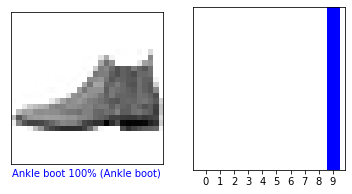

In [77]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images_orig)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()


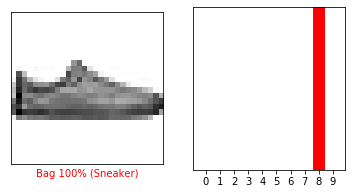

In [78]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images_orig)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()


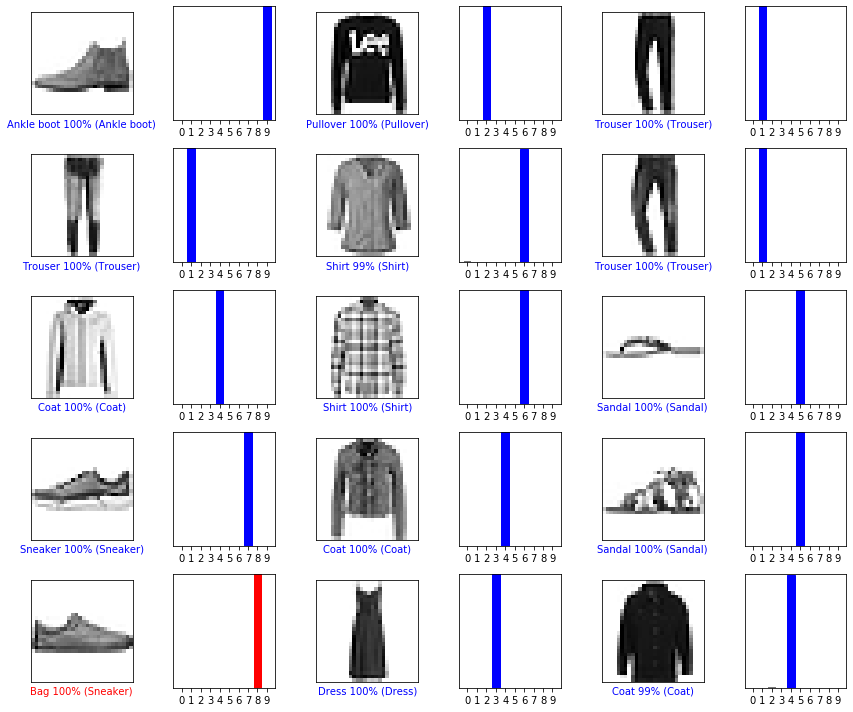

In [80]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images_orig)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()



<h1>Use the trained model</h1>
Finally, use the trained model to make a prediction about a single image.

In [85]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28, 1)


tf.keras models are optimized to make predictions on a batch, or collection, of examples at once. Accordingly, even though you're using a single image, you need to add it to a list:

In [86]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28, 1)


prediciting the label for this image:

In [87]:
predictions_single = model.predict(img)

print(predictions_single)


[[1.1805354e-07 4.8123263e-18 9.9999988e-01 7.4047230e-13 7.6445398e-17
  6.2144909e-25 9.2074647e-11 7.8702727e-27 6.0574410e-17 1.0149290e-25]]


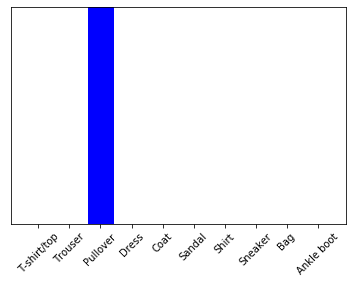

In [89]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [90]:
np.argmax(predictions_single[0])


2

And the model predicts a label as expected.